# CSCE 5300 – Introduction to Big Data and Data Science - PROJECT

Submitted By: Project Group - 3

Team Members:

Pranavi Itharaj,
Tharun SaiKumar Reddy Gonnuru,
Prashanth Shabad,
Varun Chowdary Yarra,
Sai Manideep Reddy Pallerla

# TITLE: AWARD PREDICTION BASED ON BIG DATA CO-AUTHOR NETWORK

# Data Preparation and Randomization

In [1]:
#Generating Random Number

set.seed(22)

In [2]:
# Reading the data
df <- read.csv('E:/UNT_SPRING2023/UNT_BIGDATA/project/awardcsv.csv', header = TRUE)

In [3]:
# Removing unwanted column
df = subset(df, select = -c(film))

In [4]:
# Encoding Categotical Variables
df <- data.matrix(df)
df <- as.data.frame(df)

In [5]:
# Shuffling data
df.random <- df[sample(nrow(df)),]

# Defining Input and Output Variables 

In [6]:
# Defining Input
xin <- df.random[1:7] # As there are 7 features
yt <- df.random[8] # Last output feature
yt <- as.matrix(yt) # Converting to matrix for further computation
xin <- as.matrix(xin)

# Data Standardization and Normalization

In [7]:
# Data Standardization
for (i in 1:7){
  xin[,i] <- (xin[,i]-mean(xin[,i]))/(sd(xin[,i]))
}

In [8]:
# Data Normalization
for (j in 1:7){
  xin[,j] <- ((xin[,j]-min(xin[,j]))/(max(xin[,j])-min(xin[,j])))
}

# Defining Neural Network Parameters

In [9]:
# Number of input neurons
N = 7 #As there are 7 features

# Number of hidden neurons
M = 8 # this gave the best result

# Number of Output Neurons
L = 1 # True or False, 0/1

# Learning rate
alpha = 0.4 # this gave the best result

# Momentum
momentum = 0.7 # Converge gradient

# Initializing Neural Network Weights and Biases

In [10]:
# Initializing initial weights
v = matrix(runif(N*M),N,M)-0.5 #weight layer 1
w = matrix(runif(M*L),M,L)-0.5 #weight layer 2
v0 = matrix(runif(1*M),1)-0.5 #bias layer 1

w0 = matrix(runif(1*L),1)-0.5 #bias layer 2

# Defining Activation Functions and Momentum

In [11]:
# Sigmoid Function
sigmoid <- function(x) {
  1/(1 + exp(-x))
}

In [12]:
# Derivative Sigmoid Function
sigmoid_d <- function(x) {
  (1/(1 + exp(-x)))*(1-(1/(1 + exp(-x))))
}

In [13]:
# Bipolar Sigmoid Function
sigmoidbip <- function(x) {
  (1-exp(-x))/(1+exp(-x))
}

In [14]:
# Derivative Bipolar Sigmoid Function
sigmoidbip_d <- function(x) {
  (2*(exp(-x))/(1+exp(-x))^2)
}

In [15]:
# Momentum
dv_old = matrix(0,N,M) # storing previous values
dw_old = matrix(0,M,L) 
dv0_old = matrix(0,1,M) 
dw0_old = matrix(0,1,L) 

# Neural Network Training with Backpropagation Algorithm

In [16]:
# Initialization
epochs = 100 
maxerr = 0.01 
epoch = 0 
error = 10
errortot = matrix(0,epochs,1)
len <- nrow(df)
yltot = matrix(0,len,1, TRUE)

while ((epoch < epochs) && (error > maxerr)) {
  error = 0
  for (i in 1:len) {
    zin <- xin[i,] %*% v + v0
    zm = sigmoid(zin) # Activation Sigmoid
    
    # Feed Forward Layer
    yin <- zm %*% w + w0
    yl <- sigmoid(yin) # Activation
    
    # Back Propagation Layer
    dl <- sigmoid_d(yin) # Activation
    deltal <- (yt[i,]-yl)*dl
    deltaw = matrix(0,M,L, TRUE)
    for (m in 1:M){
      for (l in 1:L){
        deltaw[m,l] <- alpha * deltal[1,l] * zm[1,m]
      }
    }
    
    deltaw0 <- alpha * deltal
    
    # Backpropagation input
    deltain <- deltal %*% t(w)
    dm <- sigmoid_d(zin) # Activation
    deltam <- deltain*dm
    deltav = matrix(0,N,M, TRUE)
    for (n in 1:N){
      for (m in 1:M){
        deltav[n,m] <- alpha * deltam[1,m] * xin[i,n]
      }
    }
    
    deltav0 <- alpha * deltam
    
    # Update weights
    w <- w + deltaw + momentum * dw_old
    v <- v + deltav + momentum * dv_old
    w0 <- w0 + deltaw0 + momentum * dw0_old
    v0 <- v0 + deltav0 + momentum * dv0_old
    
    # Storing old weights
    dv_old <- deltav
    dw_old <- deltaw
    dv0_old <- deltav0
    dw0_old <- deltaw0
    
    # Error
    error <- error + 0.5 * sum ((yt[i,]-yl)^2)
    yltot[i,] <- yl
  }
  
  epoch <- epoch + 1
  errortot[epoch,1] <- error
}

# Plotting the Output

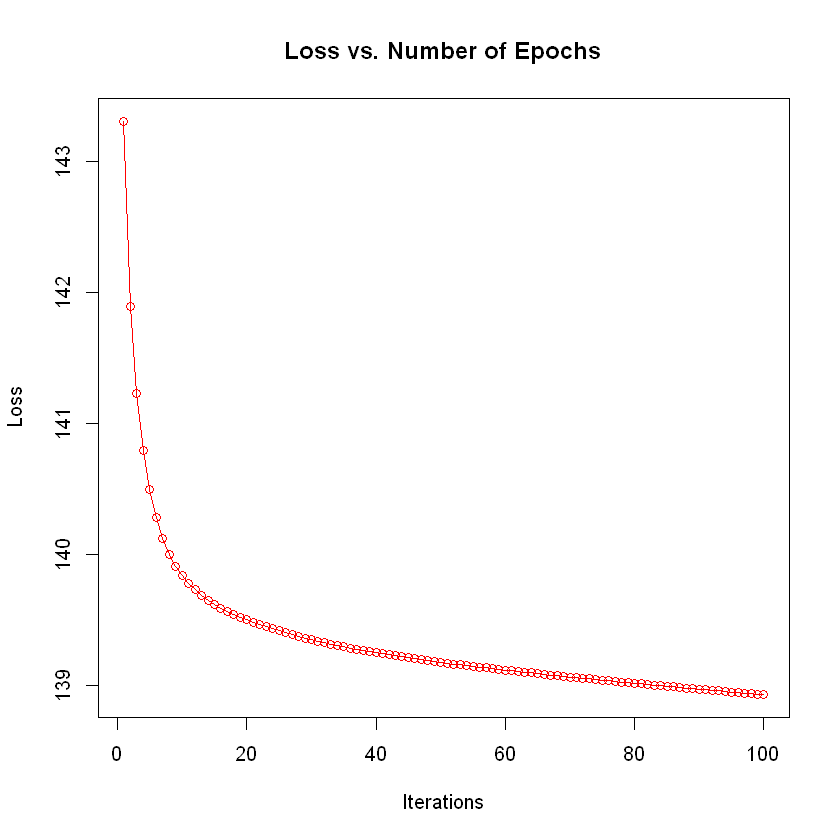

In [18]:
#plotting epoch vs error 
plot(1:100, type = "o", col = "red", errortot, main = "Loss vs. Number of Epochs", 
     xlab = "Iterations", ylab = "Loss", 
     )
